In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import sys
sys.path.insert(0, '/home/bryanb/setigen')
import setigen as stg

sys.path.insert(0, '/home/bryanb/bl-scint-analysis')
import blscint as bls
# from bls import *
import scipy.special

from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np

bshuf filter already loaded, skip it.
lz4 filter already loaded, skip it.
zfp filter already loaded, skip it.


In [3]:
%matplotlib inline

In [4]:
bls.fwhm_m, bls.hwhm_m, bls.hwem_m

(2.3548200450309493, 1.1774100225154747, 1.4142135623730951)

p: 256
23.283064365386963


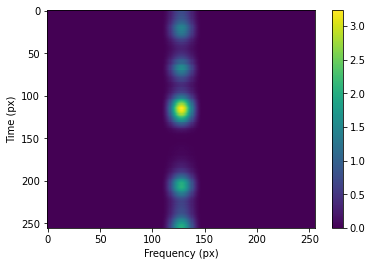

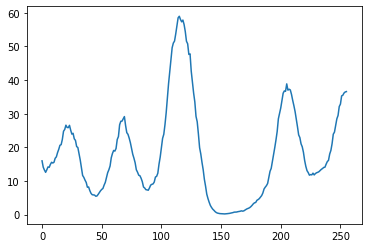

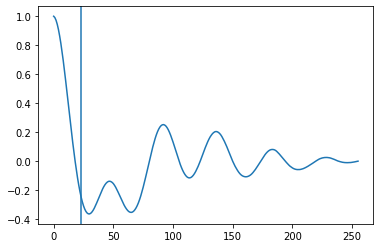

p: 256
38.76884519856878


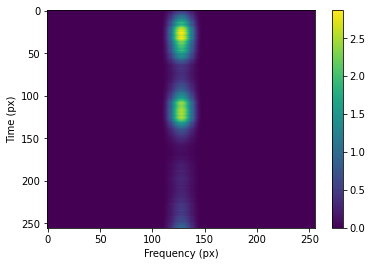

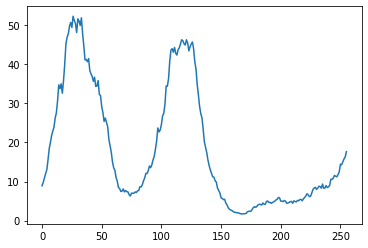

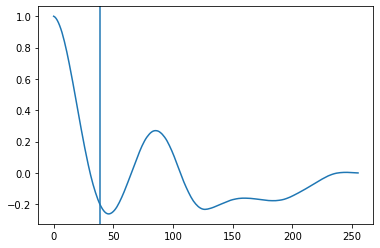

In [150]:
# Set data parameters
sample_rate = 3e9
num_branches = 1024
obs_length = 600
desired_y_px = 64*4

max_dt = obs_length / desired_y_px

chan_bw = sample_rate / num_branches
fftlength = 1048576
df = chan_bw / fftlength

int_factor = int(max_dt * df)

dt = int_factor / df

dist_factor = bls.fwhm_m
t_d = 50

for dist_factor in [bls.fwhm_m, bls.hwem_m]:

    frame = stg.Frame(fchans=256,
                  tchans=desired_y_px,
                  df=df,
                  dt=dt)


    p = int(np.ceil(t_d/dist_factor/dt*10))
    p=desired_y_px
#     p=2
    print(f"p: {p}")


    rho = bls.get_rho(frame.ts, t_d*bls.fwhm_m/dist_factor, p)
    width = t_d*bls.fwhm_m/dist_factor/frame.dt
    print(width)

    num_signals = 1
    Z = bls.build_Z(rho, frame.tchans * num_signals)
    Y = bls.get_Y(Z)

    signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(128), 
                                                    drift_rate=0),
                                  Y,
                                  stg.sinc2_f_profile(width=50*u.Hz),
                                  stg.constant_bp_profile(level=1))
    frame.render()
    plt.show()
    
    data = frame.data
    spec = np.sum(data, axis=1)
    plt.plot(spec)
    plt.show()
    
    plt.plot(bls.autocorr(spec)[:desired_y_px])
    plt.axvline(width)
    plt.show()

In [82]:
bls.fwhm_m/bls.hwem_m

1.6651092223153954

In [106]:
frame.dt

2.147483648

In [108]:
bls.fwem_m * t_d

141.4213562373095

In [138]:
np.corrcoef(spec)

1.0

In [141]:
scipy.linalg.toeplitz([1,2,3])

array([[1, 2, 3],
       [2, 1, 2],
       [3, 2, 1]])

In [142]:
bls.psi([1,2,3])

array([[1., 1., 2.],
       [1., 1., 1.],
       [2., 1., 1.]])

In [151]:
def psi1(r):
    """
    Return covariance matrix for initial multivariate normal distribution.
    """
    # r is the array of guesses to get close to desired autocorrelations
    p = len(r)
    covariance = np.ones((p, p))
    for i in range(0, p - 1):
        for j in range(0, p - i - 1):
            covariance[i + j + 1, j] = covariance[j, i + j + 1] = r[i]
    return covariance

def psi2(r):
    return scipy.linalg.toeplitz(np.concatenate([[1], r[:-1]]))

In [154]:
psi1(rho)

array([[1.        , 0.99765234, 0.99292299, ..., 0.00461402, 0.00346052,
        0.00230701],
       [0.99765234, 1.        , 0.99765234, ..., 0.00576753, 0.00461402,
        0.00346052],
       [0.99292299, 0.99765234, 1.        , ..., 0.00692103, 0.00576753,
        0.00461402],
       ...,
       [0.00461402, 0.00576753, 0.00692103, ..., 1.        , 0.99765234,
        0.99292299],
       [0.00346052, 0.00461402, 0.00576753, ..., 0.99765234, 1.        ,
        0.99765234],
       [0.00230701, 0.00346052, 0.00461402, ..., 0.99292299, 0.99765234,
        1.        ]])

In [155]:
psi2(rho)

array([[1.        , 0.99765234, 0.99292299, ..., 0.00461402, 0.00346052,
        0.00230701],
       [0.99765234, 1.        , 0.99765234, ..., 0.00576753, 0.00461402,
        0.00346052],
       [0.99292299, 0.99765234, 1.        , ..., 0.00692103, 0.00576753,
        0.00461402],
       ...,
       [0.00461402, 0.00576753, 0.00692103, ..., 1.        , 0.99765234,
        0.99292299],
       [0.00346052, 0.00461402, 0.00576753, ..., 0.99765234, 1.        ,
        0.99765234],
       [0.00230701, 0.00346052, 0.00461402, ..., 0.99292299, 0.99765234,
        1.        ]])

In [157]:
np.allclose(psi1(rho), psi2(rho))

True

p: 160
5.3730148535508375


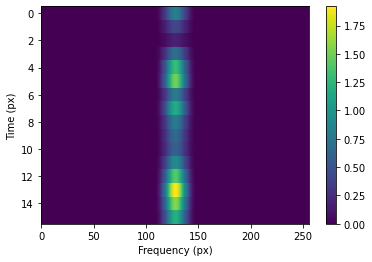

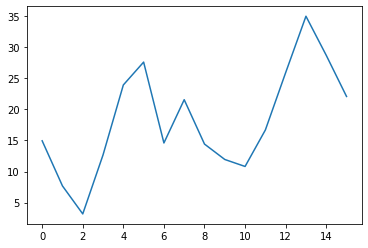

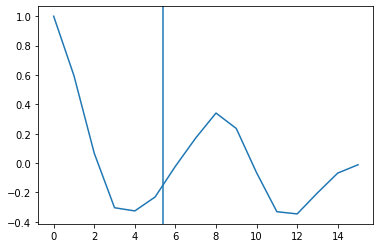

In [116]:
# Set data parameters
sample_rate = 3e9
num_branches = 1024

obs_length = 300
desired_y_px = 16


max_dt = obs_length / desired_y_px
chan_bw = sample_rate / num_branches
fftlength = 1048576
df = chan_bw / fftlength
int_factor = int(max_dt * df)
dt = int_factor / df

dist_factor = bls.hwem_m
t_d = 100

frame = stg.Frame(fchans=256,
              tchans=desired_y_px,
              df=df,
              dt=dt)


p = int(np.ceil(t_d/dist_factor/dt*10))
p=desired_y_px*10
#     p=2
print(f"p: {p}")


rho = bls.get_rho(frame.ts, t_d, p)
width = t_d/frame.dt
print(width)

num_signals = 1
Z = bls.build_Z(rho, frame.tchans * num_signals)
Y = bls.get_Y(Z)

signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(128), 
                                                drift_rate=0),
                              Y,
                              stg.sinc2_f_profile(width=50*u.Hz),
                              stg.constant_bp_profile(level=1))
frame.render()
plt.show()

data = frame.data
spec = np.sum(data, axis=1)
plt.plot(spec)
plt.show()

plt.plot(bls.autocorr(spec)[:desired_y_px*2])
plt.axvline(width)
plt.show()

4
p: 128


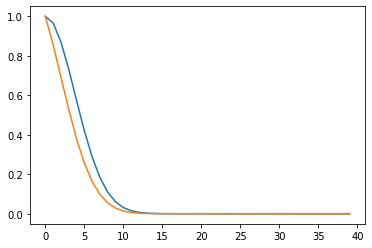

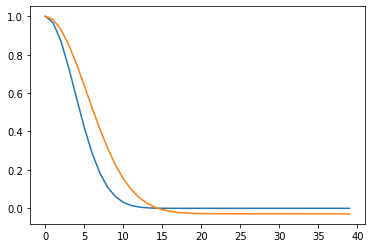

In [269]:
# Set data parameters
sample_rate = 3e9
num_branches = 1024

obs_length = 300
desired_y_px = 16


max_dt = obs_length / desired_y_px
chan_bw = sample_rate / num_branches
fftlength = 1048576
df = chan_bw / fftlength
int_factor = int(max_dt * df)
dt = int_factor / df

dist_factor = bls.hwem_m
t_d = 50

frame = stg.Frame(fchans=256,
              tchans=64*2*4,
              df=df,
              dt=dt/2)


p = int(np.ceil(t_d/dist_factor/dt*2))
print(p)
p=16*2*4#desired_y_px*1
#     p=2
print(f"p: {p}")


rho = bls.get_rho(frame.ts, t_d, p)
rho1 = stg.func_utils.gaussian(frame.ts, 0, t_d/bls.hwem_m)[0:p+1]
rho2 = bls.autocorr(stg.func_utils.gaussian(frame.ts, 0, t_d/bls.hwem_m))[0:p+1]
# plt.plot(rho)
plt.plot(rho1[:40])
plt.plot(rho2[:40])
plt.show()

ts=frame.ts
rho3 = stg.func_utils.gaussian(frame.ts, ts[len(ts)//2], t_d/bls.hwem_m)#[0:p+1]
# rho3 = stg.func_utils.gaussian(frame.ts, (ts[0] + ts[-1]) / 2, t_d/bls.hwem_m)#[0:p+1]
rho4 = bls.autocorr(stg.func_utils.gaussian(frame.ts, (ts[0] + ts[-1]) / 2, t_d/bls.hwem_m))[0:p+1]
# plt.plot(rho)
plt.plot(rho3[len(ts)//2:][:40])
plt.plot(rho4[:40])
plt.show()

p: 64
2.6865074267754188


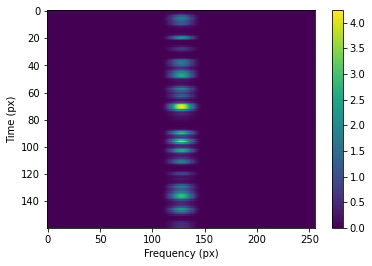

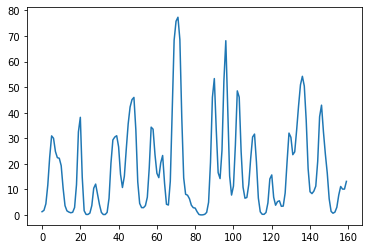

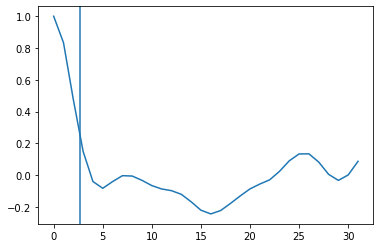

In [179]:
# Set data parameters
sample_rate = 3e9
num_branches = 1024

obs_length = 300
desired_y_px = 16


max_dt = obs_length / desired_y_px
chan_bw = sample_rate / num_branches
fftlength = 1048576
df = chan_bw / fftlength
int_factor = int(max_dt * df)
dt = int_factor / df

dist_factor = bls.hwem_m
t_d = 50

frame = stg.Frame(fchans=256,
              tchans=desired_y_px*10,
              df=df,
              dt=dt)


p = int(np.ceil(t_d/dist_factor/dt*10))
p=64#desired_y_px*10
#     p=2
print(f"p: {p}")


rho = stg.func_utils.gaussian(frame.ts, 0, t_d/bls.hwem_m)[1:p+1]
width = t_d/frame.dt
print(width)

num_signals = 1
Z = bls.build_Z(rho, frame.tchans * num_signals)
Y = bls.get_Y(Z)

signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(128), 
                                                drift_rate=0),
                              Y,
                              stg.sinc2_f_profile(width=50*u.Hz),
                              stg.constant_bp_profile(level=1))
frame.render()
plt.show()

data = frame.data
spec = np.sum(data, axis=1)
plt.plot(spec)
plt.show()

plt.plot(bls.autocorr(spec)[:desired_y_px*2])
plt.axvline(width)
plt.show()

8
p: 16


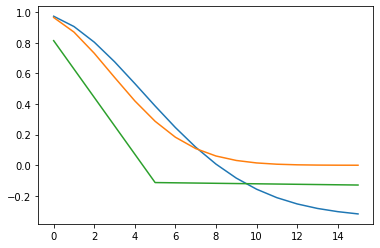

In [208]:
# Set data parameters
sample_rate = 3e9
num_branches = 1024

obs_length = 300
desired_y_px = 16


max_dt = obs_length / desired_y_px
chan_bw = sample_rate / num_branches
fftlength = 1048576
df = chan_bw / fftlength
int_factor = int(max_dt * df)
dt = int_factor / df

dist_factor = bls.hwem_m
t_d = 100

frame = stg.Frame(fchans=256,
              tchans=64,
              df=df,
              dt=dt)


p = int(np.ceil(t_d/dist_factor/dt*2))
print(p)
p=16#desired_y_px*1
#     p=2
print(f"p: {p}")


rho = bls.get_rho(frame.ts, t_d, p)
rho1 = stg.func_utils.gaussian(frame.ts, 0, t_d/bls.hwem_m)[1:p+1]

ts = frame.ts
rho2 = (np.abs(ts - (ts[0] + ts[-1]) / 2) < t_d / 2).astype(int)

rho2 = bls.autocorr(rho2)[1:p+1]
plt.plot(rho)
plt.plot(rho1)
plt.plot(rho2)
plt.show()

p: 2
2.6865074267754188


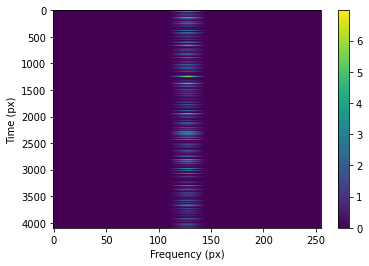

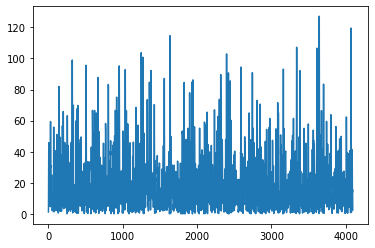

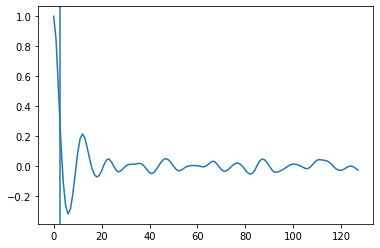

In [240]:
# Set data parameters
sample_rate = 3e9
num_branches = 1024

obs_length = 300
desired_y_px = 16


max_dt = obs_length / desired_y_px
chan_bw = sample_rate / num_branches
fftlength = 1048576
df = chan_bw / fftlength
int_factor = int(max_dt * df)
dt = int_factor / df

dist_factor = bls.hwem_m
t_d = 50

frame = stg.Frame(fchans=256,
              tchans=2**12,
              df=df,
              dt=dt)


p = int(np.ceil(t_d/dist_factor/dt*10))
p=2
#     p=2
print(f"p: {p}")


rho = stg.func_utils.gaussian(frame.ts, 0, t_d/bls.hwem_m)[1:p+1]
width = t_d/frame.dt
print(width)

num_signals = 1
Z = bls.build_Z(rho, frame.tchans * num_signals)
Y = bls.get_Y(Z)

signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(128), 
                                                drift_rate=0),
                              Y,
                              stg.sinc2_f_profile(width=50*u.Hz),
                              stg.constant_bp_profile(level=1))
frame.render()
plt.show()

data = frame.data
spec = np.sum(data, axis=1)
plt.plot(spec)
plt.show()

plt.plot(bls.autocorr(spec)[:128])
plt.axvline(width)
plt.show()